# Color spaces

In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

## BGR-space

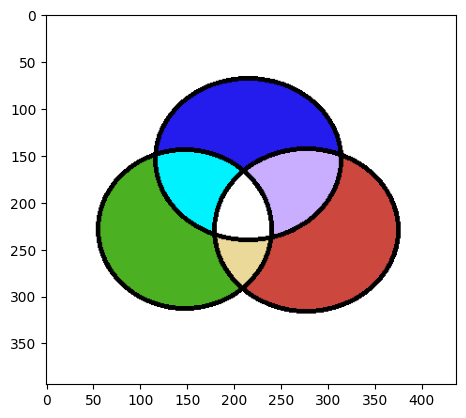

In [2]:
# Load image in BGR-space (OpenCV loads images in BGR-space by default)
image = cv2.imread("../../data/colorspaces.png")

# SHow image
plt.imshow(image)
plt.show()

## RGB-space

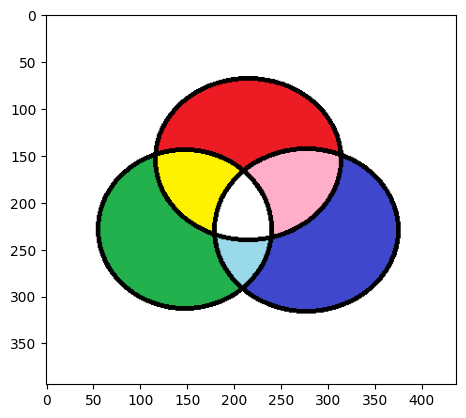

In [3]:
# Convert to RGB-space
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show
plt.imshow(rgb)
plt.show()

## Grey space

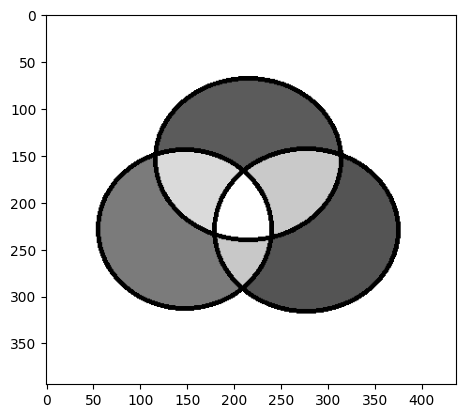

In [4]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# SHow image
plt.imshow(gray, cmap='gray')
plt.show()

## HSV-space

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


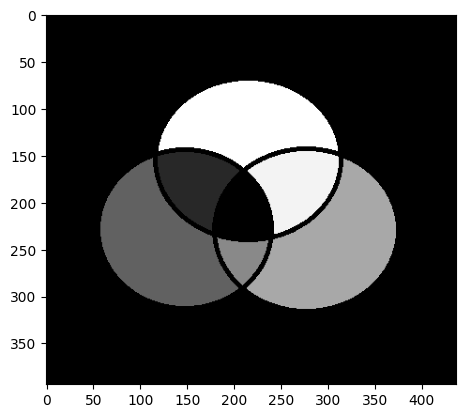

In [5]:
# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
print(hsv[:,:,0])

# Show image
plt.imshow(hsv[:,:,0], cmap='gray')
plt.show()

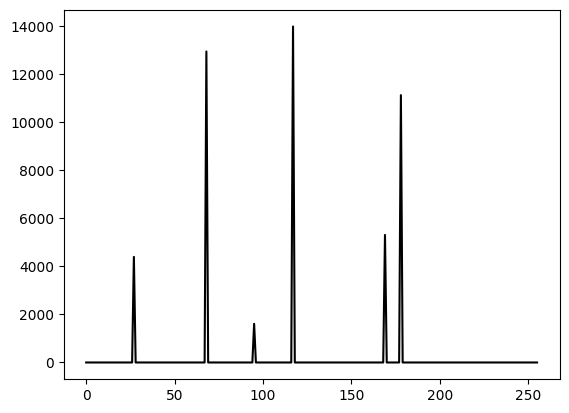

In [6]:
# Calculate histogram
hist_hsv = cv2.calcHist(cv2.split(hsv), [0], None, [256], [1, 256])

# Show images
plt.plot(hist_hsv, color='k')
plt.show()

## Masking using HSV-values

The mask is a matrix with dimensions: (394, 437) which means 394 by 437 pixels and one channel
The unique values occuring in the mask are [  0 255] (only 0 and 255)
The data type of the pixel values is stored as: <class 'numpy.uint8'> (integers)


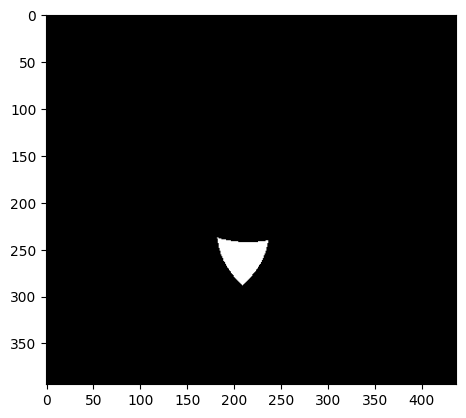

In [7]:
# Define lower and upper threshold for the pixel values we want to select (to select the blue color we define a hue bewteen 100 and 120; saturation and value in the full range)
lower_green = np.array([80, 0, 0]) # Lower HSV-threshold 
upper_green = np.array([100, 255, 255]) # Upper HSV-threshold

# Define a mask where the pixel values in the range obtain the value of 255, and other pixels the value of 0
mask = cv2.inRange(hsv, lower_green, upper_green)

# Print the shape, unique values, and data type of the image
print("The mask is a matrix with dimensions: " + str(np.shape(mask)) + ' which means 394 by 437 pixels and one channel')
print("The unique values occuring in the mask are " + str(np.unique(mask)) + ' (only 0 and 255)')
print("The data type of the pixel values is stored as: " + str(type(mask[0,0])) + ' (integers)')

# Show the mask as grey scale image
plt.imshow(mask, cmap='gray')
plt.show()